Import des fichiers dans google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import des librairies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
#from xgboost import XGBClassifier

from sklearn import metrics
#from imblearn.metrics import classification_report_imbalanced

In [5]:
# Import DataFrame pour modélisation
df = pd.read_csv('df_model.csv', index_col=0)

# La saison lue en tant que numérique est remise en chaine de caractère
df['Saison'] = df['Saison'].astype(str)

# Sélection de variables

Corrélation des variables entre elles et avec le résultat du match

In [6]:
df_complet = df.copy()
df_complet['Resultat_match'] = df_complet['Resultat_match'].replace(['H','D','A'], [2, 1,0])
df_complet.corr()

,Resultat_match,Moy_cote_domicile,Max_cote_domicile,Min_cote_domicile,Moy_cote_exterieur,Max_cote_exterieur,Min_cote_exterieur,Moy_cote_nul,Max_cote_nul,Min_cote_nul,...,note_mil_dom,note_def_dom,note_gen_dom,note_att_ext,note_mil_ext,note_def_ext,note_gen_ext,Res_an_dernier_A,Res_an_dernier_D,Res_an_dernier_H
Resultat_match,1.000000,-0.316128,-0.305735,-0.323177,0.287663,0.267276,0.303760,0.133529,0.136498,0.128379,...,0.253378,0.247336,0.253553,-0.239922,-0.267816,-0.283858,-0.282362,-0.084498,-0.028601,0.079533
Moy_cote_domicile,-0.316128,1.000000,0.996338,0.993512,-0.415806,-0.373508,-0.457489,0.123811,0.106672,0.141168,...,-0.312310,-0.315936,-0.324038,0.651118,0.651711,0.640279,0.695249,0.219029,-0.030618,-0.133929
Max_cote_domicile,-0.305735,0.996338,1.000000,0.983131,-0.394325,-0.353579,-0.435031,0.142350,0.125394,0.158528,...,-0.296448,-0.301636,-0.308108,0.636409,0.635442,0.626767,0.679335,0.211368,-0.032695,-0.129895
Min_cote_domicile,-0.323177,0.993512,0.983131,1.000000,-0.439346,-0.395719,-0.482073,0.099911,0.082286,0.120117,...,-0.329679,-0.332261,-0.341783,0.662399,0.664862,0.649177,0.707484,0.228177,-0.025637,-0.139209
Moy_cote_exterieur,0.287663,-0.415806,-0.394325,-0.439346,1.000000,0.987931,0.980986,0.821203,0.830920,0.785906,...,0.653607,0.645174,0.690102,-0.305410,-0.325617,-0.324405,-0.335326,-0.148609,-0.030481,0.181058
Max_cote_exterieur,0.267276,-0.373508,-0.353579,-0.395719,0.987931,1.000000,0.950085,0.822893,0.838743,0.778465,...,0.619361,0.613223,0.655540,-0.273524,-0.293665,-0.293255,-0.302410,-0.138314,-0.031519,0.164760
Min_cote_exterieur,0.303760,-0.457489,-0.435031,-0.482073,0.980986,0.950085,1.000000,0.793996,0.795763,0.777305,...,0.680856,0.664716,0.715625,-0.337090,-0.353072,-0.351092,-0.365159,-0.154075,-0.028376,0.205087
Moy_cote_nul,0.133529,0.123811,0.142350,0.099911,0.821203,0.822893,0.793996,1.000000,0.995667,0.982713,...,0.581348,0.545987,0.609485,0.099542,0.082116,0.055446,0.091265,-0.020007,-0.051025,0.151283
Max_cote_nul,0.136498,0.106672,0.125394,0.082286,0.830920,0.838743,0.795763,0.995667,1.000000,0.966882,...,0.572437,0.541538,0.602739,0.085256,0.066730,0.041616,0.075396,-0.025497,-0.050220,0.144790
Min_cote_nul,0.128379,0.141168,0.158528,0.120117,0.785906,0.778465,0.777305,0.982713,0.966882,1.000000,...,0.586928,0.545336,0.614250,0.115549,0.098476,0.070701,0.109693,-0.010244,-0.051502,0.161562


Les cotes à domicile sont très corrélées entre elles, on ne garde que celle qui est la plus corrélée avec le résultat du match : Min_cote_domicile.

Idem pour les cotes à l'extérieur et nul, on ne garde que Min_cote_exterieur et Max_cote_nul.

Les notes défense, milieu, attaque sont assez corrélées aussi, on garde note_def_ext et note_gen_dom.

Le coefficient de cartons rouges sur 5 matches à l'extérieur est très proche de 0, nous allons donc supprimer cette variable.
Idem pour Moy_nb_fautes_5_matchs_dom, Moy_carton_J_5_matchs_dom, Moy_carton_R_5_matchs_dom, Moy_nb_fautes_5_matchs_ext,	Moy_corners_5_matchs_ext, Moy_carton_J_5_matchs_ext, Pct_buts_par_tirs_cadres_5m_dom, Pct_buts_par_tirs_cadres_5m_ext, Num_match_ext, Num_match_dom, Nb_jours_dernier_match_dom, Nb_jours_dernier_match_ext.

In [7]:
# Suppression des variables corrélées
to_drop = [ 'Moy_cote_domicile', 'Max_cote_domicile','Moy_cote_exterieur','Max_cote_exterieur','Moy_cote_nul','Min_cote_nul','note_att_dom','note_mil_dom','note_def_dom','note_att_ext', 'note_mil_ext', 'note_gen_ext',
  'Moy_carton_R_5_matchs_ext','Moy_nb_fautes_5_matchs_dom', 'Moy_carton_J_5_matchs_dom','Moy_carton_R_5_matchs_dom','Moy_nb_fautes_5_matchs_ext',
   'Moy_corners_5_matchs_ext', 'Moy_carton_J_5_matchs_ext','Res_an_dernier_A','Res_an_dernier_H','Res_an_dernier_D','Pct_buts_par_tirs_cadres_5m_dom',
   'Pct_buts_par_tirs_cadres_5m_ext','Num_match_ext','Num_match_dom','Nb_jours_dernier_match_dom','Nb_jours_dernier_match_ext']
df.drop(to_drop, axis = 1, inplace = True)

In [8]:
# Création des dataframes de cible et de données
target = df[['Resultat_match','Saison']]
data=df.drop(['Resultat_match'],axis=1)

# Remplacement des modalités de target par des nombres pour la modélisation
target['Resultat_match'] = target['Resultat_match'].replace(['H','D','A'], [2, 1,0])

# Création des dataframes d'entraînement et de test : entraînement sur les saisons 2015 à 2020 et test sur 2021 (saison non encore terminée)
X_train_ = data.loc[data['Saison'] != '2021', :].drop('Saison',axis=1)
X_test_ = data.loc[data['Saison'] == '2021', :].drop('Saison',axis=1)
y_train = target.loc[target['Saison'] != '2021', :].drop('Saison',axis=1)
y_test = target.loc[target['Saison'] == '2021', :].drop('Saison',axis=1)
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)

y_test = y_test.to_numpy().reshape(220,)
y_train = y_train.to_numpy().reshape(2178,)

(2178, 18)
(220, 18)
(2178, 1)
(220, 1)


C:\Users\DARIDOR\AppData\Local\Temp/ipykernel_1176/1442730602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Resultat_match'] = target['Resultat_match'].replace(['H','D','A'], [2, 1,0])


Pourcentage de matchs par résultat

In [7]:
# Train
df_y_train=pd.DataFrame(y_train, columns=['Resultat_match'])
print("% de matchs par résultat sur l'échantillon d'entrainement")
display(df_y_train.Resultat_match.value_counts(normalize=True).to_frame())

# Test
df_y_test=pd.DataFrame(y_test, columns=['Resultat_match'])
print("% de matchs par résultat sur l'échantillon de test")
display(df_y_test.Resultat_match.value_counts(normalize=True).to_frame())

% de matchs par résultat sur l'échantillon d'entrainement


,Resultat_match
2,0.440312
0,0.296602
1,0.263085


% de matchs par résultat sur l'échantillon de test


,Resultat_match
2,0.413636
0,0.300000
1,0.286364


Le résultat le plus courant est la victoire à domicile (44% sur l'échantillon d'entrainement et 41,3 % su l'échantillon de test. 

Notre modèle devra avoir un pourcentage de bonne modélisation au moins supérieur à 41,3 % pour avoir un intérêt par rapport à miser toujours sur la victoire de l'équipe à domicile.

# SVM

Accuracy:  0.4727272727272727


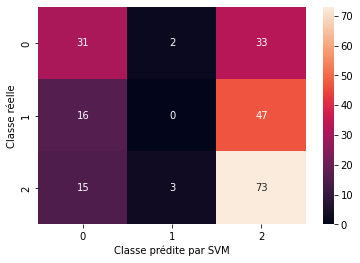

In [8]:
# Modèle SVM avec les paramètres par défaut
svm = svm.SVC()
svm.fit(X_train, y_train)

# Matrice de confusion et scores
y_pred_svm = svm.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred_svm, rownames = ['Classe réelle'], colnames = ['Classe prédite par SVM'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_svm));

In [9]:
# Rapport de classification
print(classification_report_imbalanced(y_test, y_pred_svm)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.47      0.80      0.48      0.61      0.36        66
          1       0.00      0.00      0.97      0.00      0.00      0.00        63
          2       0.48      0.80      0.38      0.60      0.55      0.32        91

avg / total       0.35      0.47      0.67      0.39      0.41      0.24       220



In [10]:
# Modèle SVM avec un Grid Search
param_svm = {'C':[0.1,1,10], 'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}

grid_svm = GridSearchCV(estimator=svm, param_grid=param_svm)
grid_svm.fit(X_train,y_train)

# Meilleurs paramètres
print(grid_svm.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


Accuracy:  0.4727272727272727


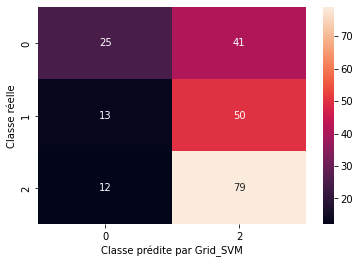

In [11]:
# Matrice de confusion et scores
y_pred_grid_svm = grid_svm.predict(X_test)
confusion_matrix = pd.crosstab(y_test,y_pred_grid_svm, rownames = ['Classe réelle'], colnames = ['Classe prédite par Grid_SVM'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_grid_svm))

Le score est le même qu'avec les paramètres par défaut

In [12]:
# Rapport de classification
print(classification_report_imbalanced(y_test, y_pred_grid_svm)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.38      0.84      0.43      0.56      0.30        66
          1       0.00      0.00      1.00      0.00      0.00      0.00        63
          2       0.46      0.87      0.29      0.61      0.51      0.27        91

avg / total       0.34      0.47      0.66      0.38      0.38      0.20       220



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random Forest

Accuracy:  0.4590909090909091


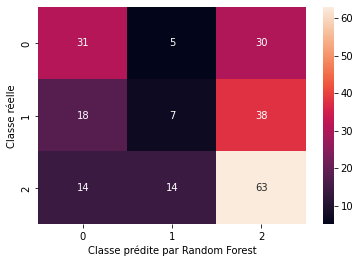

In [13]:
# Modèle Random Forest avec les paramètres par défaut
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Matrice de confusion et scores
y_pred_rf = rf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames = ['Classe réelle'], colnames = ['Classe prédite par Random Forest'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_rf));

Score changeant à chaque compilation (compris entre 0.43 et 0.49)

In [14]:
# Rapport de classification
print(classification_report_imbalanced(y_test, y_pred_rf)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.49      0.47      0.79      0.48      0.61      0.36        66
          1       0.27      0.11      0.88      0.16      0.31      0.09        63
          2       0.48      0.69      0.47      0.57      0.57      0.33        91

avg / total       0.42      0.46      0.68      0.42      0.51      0.27       220



In [15]:
# Modèle Random Forest avec Grid Search 

param_rf = {'max_features': ["sqrt", "log2" ], 'min_samples_split': range(2, 60, 3)}

grid_rf = GridSearchCV(estimator = rf, param_grid = param_rf)
grid_rf.fit(X_train, y_train)

# Meilleurs paramètres
print(grid_rf.best_params_)

{'max_features': 'log2', 'min_samples_split': 56}


Accuracy:  0.4681818181818182


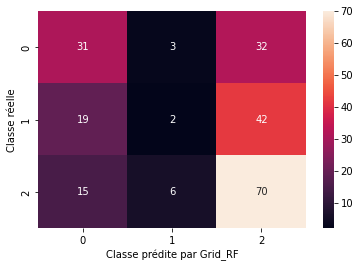

In [16]:
# Matrice de confusion et scores
y_pred_grid_rf = grid_rf.predict(X_test)
confusion_matrix = pd.crosstab(y_test,y_pred_grid_rf, rownames = ['Classe réelle'], colnames = ['Classe prédite par Grid_RF'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_grid_rf));

In [17]:
# Rapport de classification
print(classification_report_imbalanced(y_test, y_pred_grid_rf)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.48      0.47      0.78      0.47      0.60      0.35        66
          1       0.18      0.03      0.94      0.05      0.17      0.03        63
          2       0.49      0.77      0.43      0.60      0.57      0.34        91

avg / total       0.40      0.47      0.68      0.40      0.47      0.25       220



Les résultats sont mauvais surtout pour modéliser les matchs nuls (modalité 1)

# KNN

Accuracy:  0.4


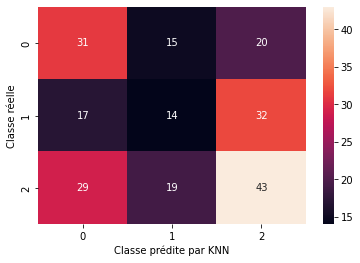

In [18]:
# Modèle KNN avec les paramètres par défaut
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Matrice de confusion et scores
y_pred_knn = knn.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred_knn, rownames = ['Classe réelle'], colnames = ['Classe prédite par KNN'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_knn));

Le score est inférieur à SVM et à miser toujours sur une victoire à domicile.

In [19]:
# Rapport de classification
print(classification_report_imbalanced(y_test, y_pred_knn)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.40      0.47      0.70      0.43      0.57      0.32        66
          1       0.29      0.22      0.78      0.25      0.42      0.16        63
          2       0.45      0.47      0.60      0.46      0.53      0.28        91

avg / total       0.39      0.40      0.68      0.39      0.51      0.26       220



In [20]:
# Modèle KNN avec GridSearch

param_knn = {'n_neighbors' : [k for k in range(5,60,5)],
                  'weights' : ['uniform', 'distance'],
                 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'metric' : ['minkowski', 'manhattan', 'chebyshev', 'euclidean']}

grid_knn = GridSearchCV(estimator = knn, param_grid = param_knn)
grid_knn.fit(X_train, y_train)

# Meilleurs paramètres
print(grid_knn.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 55, 'weights': 'distance'}


Accuracy:  0.4727272727272727


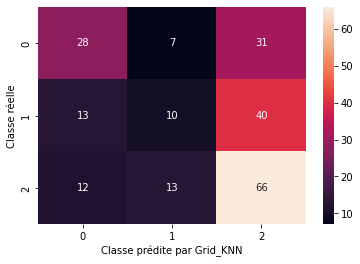

In [21]:
# Matrice de confusion et scores
y_pred_grid_knn = grid_knn.predict(X_test)
confusion_matrix = pd.crosstab(y_test,y_pred_grid_knn, rownames = ['Classe réelle'], colnames = ['Classe prédite par Grid_KNN'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_grid_knn));

Score identique au SVM

In [22]:
# Rapport de classification
print(classification_report_imbalanced(y_test, y_pred_grid_knn)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.42      0.84      0.47      0.60      0.34        66
          1       0.33      0.16      0.87      0.22      0.37      0.13        63
          2       0.48      0.73      0.45      0.58      0.57      0.34        91

avg / total       0.45      0.47      0.69      0.44      0.52      0.28       220



# Bagging

In [23]:
bc = BaggingClassifier(n_estimators = 1000, oob_score = True)
bc.fit(X_train, y_train)

BaggingClassifier(n_estimators=1000, oob_score=True)

In [24]:
# Erreur Out Of Bag
bc.oob_score_

0.4921946740128558

In [25]:
# Score
bc.score(X_test, y_test)

0.4727272727272727

# XGBoost

In [26]:
boost = XGBClassifier()
boost.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

Accuracy:  0.4863636363636364


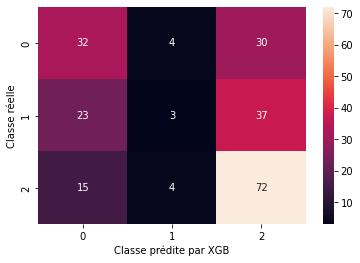

In [27]:
# Matrice de confusion et scores
y_pred_boost = boost.predict(X_test)
confusion_matrix = pd.crosstab(y_test,y_pred_boost, rownames = ['Classe réelle'], colnames = ['Classe prédite par XGB'])
sns.heatmap(confusion_matrix, annot = True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_boost));

Meilleur score obtenu jusqu'ici

#Réduction de dimension - PCA

Test sur KNN

In [41]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

clf=KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors= 55, weights= 'distance')

pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf.fit(X_train_pca, y_train)
print(clf.score(X_test_pca, y_test))

0.5045454545454545


In [42]:
print(pca.n_components_)

10


In [50]:
abs(pca.components_)

array([[2.39607167e-01, 3.72917448e-01, 2.77255185e-01, 1.26082786e-01,
        3.25450431e-02, 3.01333950e-01, 3.29784634e-01, 3.30669240e-01,
        2.82082782e-01, 1.90448820e-01, 1.10925910e-01, 1.17360801e-01,
        1.13517026e-01, 8.80036881e-02, 3.02775386e-01, 1.16376652e-01,
        3.41327934e-01, 1.28533068e-01],
       [2.71535447e-01, 2.93422480e-02, 1.59046221e-01, 9.02614916e-02,
        1.51172123e-01, 1.27189197e-01, 1.38205340e-01, 1.41680064e-01,
        1.27673752e-01, 8.41398343e-02, 3.63029225e-01, 3.83482342e-01,
        3.71458239e-01, 3.05435369e-01, 1.25342561e-01, 3.54444092e-01,
        1.32052901e-01, 3.48540220e-01],
       [2.80754749e-02, 5.20260834e-02, 1.42446304e-02, 1.70320825e-01,
        1.56315623e-01, 3.17267374e-01, 1.58496243e-01, 2.18475167e-01,
        4.79733556e-01, 6.27406163e-01, 8.43808966e-02, 3.59875405e-02,
        7.99576959e-02, 1.31994969e-01, 3.08368137e-01, 7.95283582e-02,
        1.09167581e-01, 4.37732358e-04],
       [2.172

In [43]:
pd.DataFrame(pca.components_,columns=X_train_.columns, index = ['PC-1','PC-2', 'PC-3','PC-4','PC-5',
                                                                     'PC-6','PC-7','PC-8','PC-9','PC-10'])

,Min_cote_domicile,Min_cote_exterieur,Max_cote_nul,Nb_buts_equipe_dom_an_dernier,Nb_buts_equipe_ext_an_dernier,Moy_points_5_match_dom,Moy_buts_5_matchs_dom,Moy_tirs_cadres_5_matchs_dom,Moy_tirs_5_matchs_dom,Moy_corners_5_matchs_dom,Moy_points_5_match_ext,Moy_buts_5_matchs_ext,Moy_tirs_cadres_5_matchs_ext,Moy_tirs_5_matchs_ext,Points_moy_match_saison_dom,Points_moy_match_saison_ext,note_gen_dom,note_def_ext
PC-1,-0.239607,0.372917,0.277255,0.126083,-0.032545,0.301334,0.329785,0.330669,0.282083,0.190449,-0.110926,-0.117361,-0.113517,-0.088004,0.302775,-0.116377,0.341328,-0.128533
PC-2,0.271535,-0.029342,0.159046,0.090261,0.151172,0.127189,0.138205,0.141680,0.127674,0.084140,0.363029,0.383482,0.371458,0.305435,0.125343,0.354444,0.132053,0.348540
PC-3,0.028075,-0.052026,-0.014245,-0.170321,-0.156316,-0.317267,-0.158496,0.218475,0.479734,0.627406,0.084381,0.035988,-0.079958,-0.131995,-0.308368,0.079528,-0.109168,-0.000438
PC-4,0.021726,0.022271,0.044821,0.609637,0.605130,-0.218722,-0.174390,-0.053828,0.073828,0.136364,-0.202926,-0.140295,-0.008497,0.109934,-0.177566,-0.152947,0.120693,0.107147
PC-5,0.091826,0.419612,0.528603,0.022422,-0.324453,-0.300385,-0.238650,-0.250680,-0.172723,0.009879,-0.000436,0.137255,0.194708,0.181752,-0.131038,-0.107271,0.175167,-0.202975
PC-6,0.275487,0.160780,0.326316,-0.054376,0.193771,-0.056429,-0.018569,-0.089710,-0.122077,-0.101858,0.152445,-0.033986,-0.431227,-0.588308,-0.010642,0.327391,0.050073,0.219438
PC-7,0.427922,0.007261,0.276175,-0.483434,0.196581,0.049777,0.122864,0.132872,0.081772,-0.046736,-0.419329,-0.235380,0.025823,0.248654,-0.053905,-0.235135,-0.164229,0.212614
PC-8,-0.296004,0.122975,-0.041499,-0.535707,0.596845,-0.002700,-0.134208,-0.178473,-0.074060,0.171336,0.147924,0.163543,0.116315,-0.019550,0.103453,-0.021329,0.156624,-0.263420
PC-9,0.042731,-0.062977,-0.097549,-0.026486,-0.179633,0.120213,-0.277467,-0.350122,-0.186447,0.490171,-0.159055,-0.229440,-0.058195,0.087090,0.472006,0.075559,0.161936,0.345012
PC-10,-0.255979,0.058234,-0.111081,-0.188827,-0.053076,-0.352606,-0.137030,0.132924,0.200296,-0.380037,0.004259,-0.341669,-0.101514,0.278121,-0.017018,0.348358,0.407036,0.207880


La réduction de dimension augmente le score du KNN en ne gardant que 10 composantes au lieu des 18 variables de départ et donne le meilleur résultat sur cet ensemble de variables.